In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Heart_disease_statlog.csv')

In [35]:
X = df.drop('target', axis = 1)
y = df['target']

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\kvakv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_pred = logreg.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precission: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')


Accuracy: 0.9074074074074074
Precission: 0.9444444444444444
Recall: 0.8095238095238095


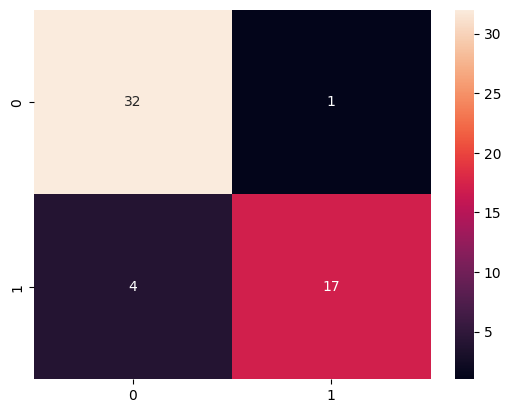

In [38]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [39]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
rf = RandomForestClassifier()
kf = KFold(n_splits=11)

for train, test in kf.split(X, y):
    rf.fit(X.iloc[train, :], y[train])
    y_pred = rf.predict(X.iloc[test, :])
    print(accuracy_score(y[test], y_pred) * 100)

76.0
72.0
88.0
76.0
84.0
84.0
75.0
83.33333333333334
83.33333333333334
95.83333333333334
79.16666666666666


In [40]:
train, test = list(kf.split(X, y))[8]
X_train, y_train = X.iloc[train, :], y[train]
X_test , y_test = X.iloc[test, : ] , y[test]
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [41]:
ypred = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test,ypred)*100}')
print(f'Precision: {precision_score(y_test,ypred)*100}')
print(f'Recall: {recall_score(y_test,ypred)}')

Accuracy: 83.33333333333334
Precision: 75.0
Recall: 0.9


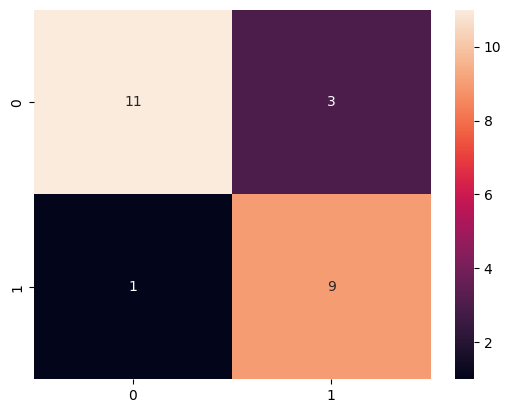

In [42]:
import seaborn as sns
cm = confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True)
plt.show()